## 範例重點

學會從 Keras 內建函式取得資料

能夠建立簡易的深度學習模型

觀察並了解過擬合現象

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


## 準備資料

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
def normalize_cifar10_data(x, y):
    x = x.reshape((len(x), -1)) / 255.
    y = np_utils.to_categorical(y, num_classes=10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [4]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (50000, 32, 32, 3)
y.shape: (50000, 1)


In [5]:
print('After normalization:')
X_train, y_train = normalize_cifar10_data(X_train, y_train)
X_test, y_test = normalize_cifar10_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (50000, 3072)
y.shape: (50000, 10)


## 定義函數

In [6]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## 定義模型

In [7]:
def build_model(x):
    main_input = Input(shape=(x.shape[-1],), dtype='float32', name='main_input')
    mid_layer = Dense(units=512, activation='relu')(main_input)
    mid_layer = Dense(units=256, activation='relu')(mid_layer)
    mid_layer = Dense(units=128, activation='relu')(mid_layer)
    main_output = Dense(units=10, activation='softmax')(mid_layer)
    return Model(inputs=[main_input], outputs=[main_output])

In [8]:
model, optimizer = build_model(X_train), Adam(lr=0.001)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## 訓練模型

In [10]:
train_history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_test, y_test),
                          shuffle=True, verbose=2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
 - 26s - loss: 1.8915 - acc: 0.3178 - val_loss: 1.7621 - val_acc: 0.3567
Epoch 2/100
 - 24s - loss: 1.6976 - acc: 0.3907 - val_loss: 1.6389 - val_acc: 0.4169
Epoch 3/100
 - 23s - loss: 1.6027 - acc: 0.4250 - val_loss: 1.6352 - val_acc: 0.4124
Epoch 4/100
 - 23s - loss: 1.5425 - acc: 0.4487 - val_loss: 1.5785 - val_acc: 0.4389
Epoch 5/100
 - 23s - loss: 1.4931 - acc: 0.4688 - val_loss: 1.4887 - val_acc: 0.4756
Epoch 6/100
 - 23s - loss: 1.4547 - acc: 0.4789 - val_loss: 1.5076 - val_acc: 0.4630
Epoch 7/100
 - 23s - loss: 1.4301 - acc: 0.4899 - val_loss: 1.4484 - val_acc: 0.4856
Epoch 8/100
 - 23s - loss: 1.3945 - acc: 0.5026 - val_loss: 1.4222 - val_acc: 0.4917
Epoch 9/100
 - 23s - loss: 1.3696 - acc: 0.5104 - val_loss: 1.4514 - val_acc: 0.4840
Epoch 10/100
 - 23s - loss: 1.3451 - acc: 0.5164 - val_loss: 1.4771 - val_acc: 0.4816
Epoch 11/100
 - 23s - loss: 1.3229 - acc: 0.5291 - val_loss: 1.4258 - val_acc: 0.4978
Epoch 12/100


Epoch 96/100
 - 25s - loss: 0.3738 - acc: 0.8645 - val_loss: 2.9381 - val_acc: 0.4915
Epoch 97/100
 - 25s - loss: 0.3800 - acc: 0.8621 - val_loss: 2.9933 - val_acc: 0.4901
Epoch 98/100
 - 25s - loss: 0.3844 - acc: 0.8628 - val_loss: 3.1012 - val_acc: 0.4852
Epoch 99/100
 - 25s - loss: 0.3762 - acc: 0.8654 - val_loss: 3.0117 - val_acc: 0.4945
Epoch 100/100
 - 25s - loss: 0.3541 - acc: 0.8730 - val_loss: 2.9930 - val_acc: 0.4869


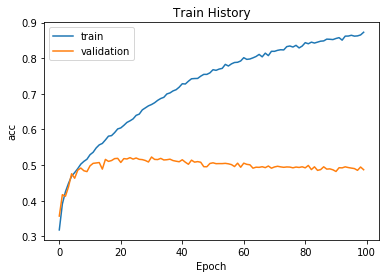

In [11]:
show_train_history(train_history, 'acc', 'val_acc')

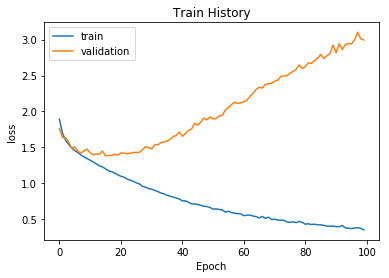

In [12]:
show_train_history(train_history, 'loss', 'val_loss')

## 作業

1. 請將 Epochs 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢